In [2]:
from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_absolute_error
# from sklearn.model_selection import GridSearchCV
# import xgboost as xgb

In [23]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from math import radians, sin, cos, acos
import numpy as np

In [4]:
def coord_to_distance(lat1, long1, lat2, long2):
    olat = radians(float(lat1))
    olong = radians(float(long1))
    dlat = radians(float(lat2))
    dlong = radians(float(long2))
    dist = round(
        (
            6371.01
            * acos(sin(olat) * sin(dlat) + cos(olat) * cos(dlat) * cos(olong - dlong))
        ),
        3,
    )
    return dist


def convert_c(cost):
    return round((float(cost) * 10000), 3)


def convert_w(weight):
    return round((float(weight) * 100), 2)


def convert_d(loading):
    return round((float(loading) / 1000), 6)

In [14]:
df = pd.read_csv('Reference/train_data.csv', sep=';')
df = df.dropna()
print(df.shape)
df = df.drop_duplicates()
df['distance'] = df.apply(
    lambda x: coord_to_distance(
        x['origin_latitude'],
        x['origin_longitude'],
        x['destination_latitude'],
        x['destination_longitude'],
    ),
    axis=1,
)
df['cost'] = df.apply(lambda x: convert_c(x['cost']), axis=1)
df['weight'] = df.apply(lambda x: convert_w(x['weight']), axis=1)
df['loading_meters'] = df.apply(lambda x: convert_d(x['loading_meters']), axis=1)
df = df.drop(
    columns=[
        'is_adr',
        'shipping_date',
        'origin_latitude',
        'origin_longitude',
        'destination_latitude',
        'destination_longitude',
    ]
)
cost = df['cost']
df = df.drop(columns=['cost'])
df['cost'] = cost
df.to_csv('Data/train.csv', index=False)
print(df.shape)
print(df.head())

(251155, 9)
(243652, 4)
   weight  loading_meters  distance    cost
0    51.3        0.000195   306.910  2470.0
1    48.4        0.000195   126.543  2480.0
2    48.4        0.000195   266.597  2760.0
3    50.4        0.000195   385.995  2760.0
4    48.4        0.000195   844.049  5530.0


In [15]:
df2 = pd.read_csv('Reference/test_data.csv', sep=';')
df2 = df2.dropna()
print(df2.shape)
df2 = df2.drop_duplicates()
df2['distance'] = df2.apply(
    lambda x: coord_to_distance(
        x['origin_latitude'],
        x['origin_longitude'],
        x['destination_latitude'],
        x['destination_longitude'],
    ),
    axis=1,
)
df2['weight'] = df2.apply(lambda x: convert_w(x['weight']), axis=1)
df2['loading_meters'] = df2.apply(lambda x: convert_d(x['loading_meters']), axis=1)
df2 = df2.drop(
    columns=[
        'is_adr',
        'shipping_date',
        'origin_latitude',
        'origin_longitude',
        'destination_latitude',
        'destination_longitude',
    ]
)
df2.to_csv('Data/test.csv', index=False)
print(df2.shape)
print(df2.head())

(62789, 8)
(61309, 3)
   weight  loading_meters  distance
0    20.5        0.000195   328.751
1    15.5        0.000195   518.096
2    48.4        0.000195   147.537
3    44.5        0.000069   386.924
4    49.7        0.000067   412.826


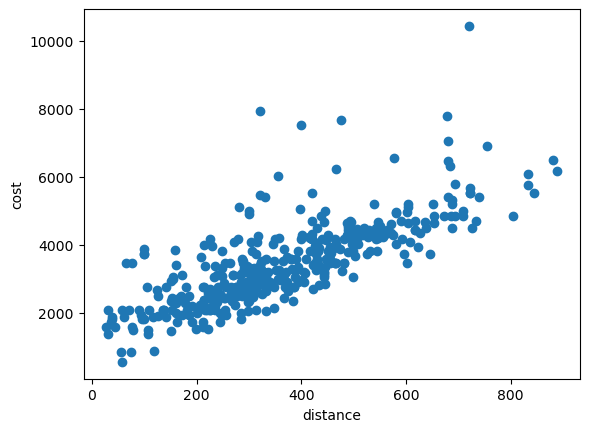

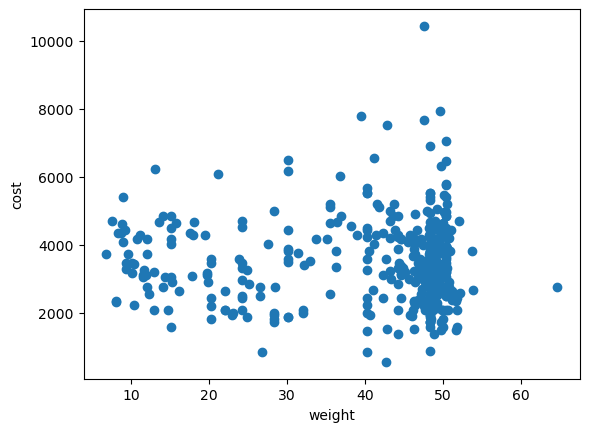

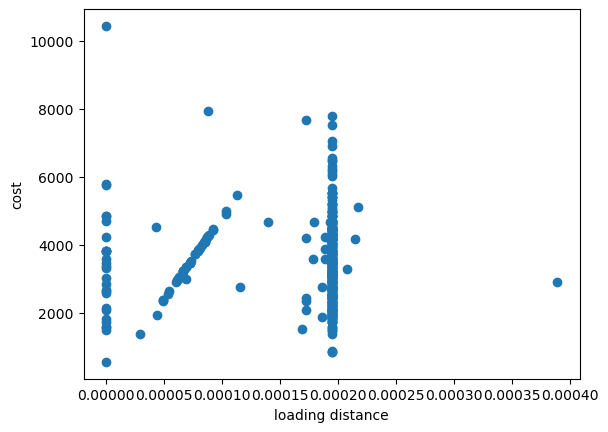

In [7]:
weight = df['weight'][:400]
cost = df['cost'][:400]
distance = df['distance'][:400]
loading = df['loading_meters'][:400]

fig, ax = plt.subplots(1)
fig2, ax2 = plt.subplots(1)
fig3, ax3 = plt.subplots(1)

ax.set_xlabel("distance")
ax.set_ylabel("cost")
ax.scatter(distance, cost)

ax2.set_xlabel("weight")
ax2.set_ylabel("cost")
ax2.scatter(weight, cost)

ax3.set_xlabel("loading distance")
ax3.set_ylabel("cost")
ax3.scatter(loading, cost)

# Show the plots
plt.show()

In [11]:
X = df.drop(columns=['cost'])
Y = df['cost']
model = LinearRegression()
model.fit(X, Y)
r2 = model.score(X, Y)
print(f"R2 score is: {r2}")

R2 score is: 0.6052454516584098


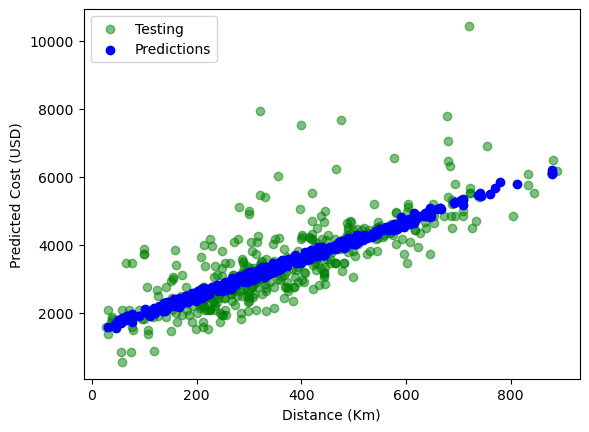

In [86]:
X_test = df2
Y_test = model.predict(X_test)
X1 = X['distance'][:400]
Y1 = Y[:400]
X2 = X_test['distance'][:400]
Y2 = Y_test[:400]
plt.scatter(X1, Y1, c='g', alpha=0.5, label='Testing')
plt.scatter(X2, Y2, c='b', label='Predictions')
plt.xlabel('Distance (Km)')
plt.ylabel('Predicted Cost (USD)')
plt.legend()
plt.show()

In [111]:
t=np.array([40,0.00002,2228.751]).reshape(1,-1)
tp=model.predict(t)
n=len(tp)
for i in tp:
    print(i)
print()

13794.325232608857



/Users/aashu/miniforge3/envs/sih/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
